In [1]:
import numpy as np
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Plot the log_pdf

In [2]:
def normal_log_pdf(x, mu, sigma):
    return -np.log(2*np.pi*sigma**2)/2 - (x - mu)**2 / (2 * sigma**2)

In [3]:
rr = np.linspace(-5, 5, 101)
aa = np.linspace(-5, 5, 101)

C = np.zeros((len(aa), len(rr)))

for i, a in enumerate(aa):
    for j, r in enumerate(rr):
        C[i, j] = normal_log_pdf(r, 0, np.exp(a/2)) + normal_log_pdf(a, 0, 3)
        

<ipython-input-4-0421bebd6693>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)


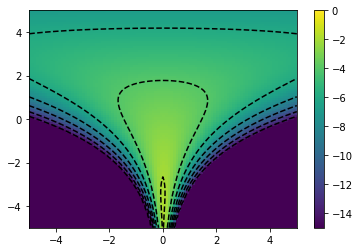

In [4]:
vmin = -15
vmax = 0
plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.contour(rr, aa, np.clip(C, vmin, vmax), colors="k")

# Model a

In [5]:
model10_8a = CmdStanModel(stan_file="model/model10-8a.stan")
print(model10_8a)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap10/model/model10-8a


CmdStanModel: name=model10-8a
	 stan_file=/workdir/chap10/model/model10-8a.stan
	 exe_file=/workdir/chap10/model/model10-8a
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
fit10_8a = model10_8a.sample()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4


<ipython-input-7-f82bdc4f60b5>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)


(-5.0, 5.0)

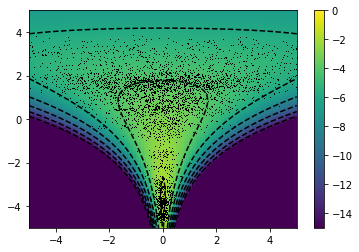

In [7]:
vmin = -15
vmax = 0
plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.contour(rr, aa, np.clip(C, vmin, vmax), colors="k")
plt.plot(fit10_8a.stan_variable("r")[:, 0], fit10_8a.stan_variable("a"), "k,")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [8]:
summary10_8a = fit10_8a.summary()
summary10_8a[summary10_8a["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-822.742000,586.80800,1057.40000,-2092.1500,-1173.68000,1540.53000,3.24701,0.201103,2.69950
a,0.645246,1.17259,2.11455,-4.0862,1.33901,3.18353,3.25194,0.201408,2.69243


# Model b

In [9]:
model10_8b = CmdStanModel(stan_file="model/model10-8b.stan")
print(model10_8b)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chap10/model/model10-8b


CmdStanModel: name=model10-8b
	 stan_file=/workdir/chap10/model/model10-8b.stan
	 exe_file=/workdir/chap10/model/model10-8b
	 compiler_optons=stanc_options=None, cpp_options=None


In [10]:
fit10_8b = model10_8b.sample()

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3


<ipython-input-11-804eb7fd0f5a>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)


(-5.0, 5.0)

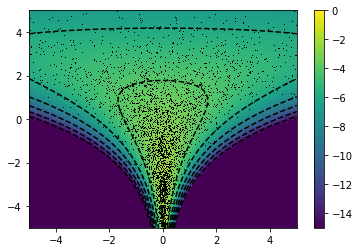

In [11]:
vmin = -15
vmax = 0
plt.pcolormesh(rr, aa, C, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.contour(rr, aa, np.clip(C, vmin, vmax), colors="k")
plt.plot(fit10_8b.stan_variable("r")[:, 0], fit10_8b.stan_variable("a"), "k,")
plt.xlim(-5, 5)
plt.ylim(-5, 5)

In [12]:
summary10_8b = fit10_8b.summary()
summary10_8b[summary10_8b["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
